<a href="https://colab.research.google.com/github/tackulus/Finished-Course/blob/main/229321_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Manipulation Project: การเปรียบเทียบข้อมูลการขึ้นลงของราคาซื้อขายหลักทรัพย์ย้อนหลังของ BBL กับ SCB 6 เดือนย้อนหลัง**

**สมาชิกกลุ่ม**

    610110604   ไอริณ แท่นประมูล (จัดทำ information)

    610510531   กษิดิศ ต.เจริญ (เขียนโปรแกรม)

    610510581   รัศมีวรรณ ศรีวงค์พรรณ (จัดทำ information)

    610510616   ฐานัชฌา มหาวัน (เรียบเรียงและสรุปผลรายงาน)

    610510620   ธีรภัทร์ ครินชัย (เขียนโปรแกรม)


# การดึงข้อมูลจากเว็บไซต์ (Data Scraping)

เริ่มจากการ Import modules

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

รวบรวม urls ของข้อมูลจากเว็บไซต์ตลาดหลักทรัพย์แห่งประเทศไทย (SET)

In [ ]:
url_BBL = ['https://www.set.or.th/set/historicaltrading.do?symbol=BBL',
           'https://www.set.or.th/set/historicaltrading.do?symbol=BBL&page=1&language=th&country=TH&type=trading',
           'https://www.set.or.th/set/historicaltrading.do?symbol=BBL&page=2&language=th&country=TH&type=trading']

url_SCB = ['https://www.set.or.th/set/historicaltrading.do?symbol=SCB',
           'https://www.set.or.th/set/historicaltrading.do?symbol=SCB&page=1&language=th&country=TH&type=trading',
           'https://www.set.or.th/set/historicaltrading.do?symbol=SCB&page=2&language=th&country=TH&type=trading']

ดึงข้อมูลจาก urls มาสร้างเป็น DataFrame แล้วบันทึกเก็บเป็นไฟล์ .csv

In [ ]:
def get_df(urls):
    columns = {'Date': 'str',
               'Open': 'float',
               'High': 'float',
               'Low': 'float',
               'Close': 'float',
               'Change': 'float',
               '%Change': 'float',
               'Volume': 'int',
               'Total Price (Baht)': 'float'}

    data = []
    for link in urls:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, 'html.parser')
        rows = [i.find_all('td') for i in soup(align='right')]
        data += [list(map(lambda x: x.text, row)) for row in rows]

    df = (pd.DataFrame(data, columns=columns)
          .applymap(lambda x: x.replace(',', ''))
          .astype(columns))
    
    df['Total Price (Baht)'] *= 1000
    
    to_BC = lambda x: x[:-4] + str(int(x[-4:])-543)
    df['Date'] = pd.to_datetime(df['Date'].apply(to_BC), format="%d/%m/%Y")
    df = df.sort_values('Date').set_index('Date')
    
    return df

In [ ]:
get_df(url_BBL).to_csv("BBL.csv")
get_df(url_SCB).to_csv("SCB.csv")

อ่านข้อมูลหลักทรัพย์ BBL และ SCB

In [ ]:
def read_df(path):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').set_index('Date')
    return df

In [ ]:
BBL = read_df("BBL.csv")
BBL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-10-01 to 2021-03-09
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                105 non-null    float64
 1   High                105 non-null    float64
 2   Low                 105 non-null    float64
 3   Close               105 non-null    float64
 4   Change              105 non-null    float64
 5   %Change             105 non-null    float64
 6   Volume              105 non-null    int64  
 7   Total Price (Baht)  105 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.4 KB


In [ ]:
SCB = read_df("SCB.csv")
SCB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-10-01 to 2021-03-09
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                105 non-null    float64
 1   High                105 non-null    float64
 2   Low                 105 non-null    float64
 3   Close               105 non-null    float64
 4   Change              105 non-null    float64
 5   %Change             105 non-null    float64
 6   Volume              105 non-null    int64  
 7   Total Price (Baht)  105 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.4 KB


นำข้อมูลราคาปิดของหุ้นทั้งสองมาสร้างเป็น DataFrame ชื่อ stocks

In [ ]:
stocks = pd.DataFrame({'BBL': BBL['Close'], 'SCB': SCB['Close']})
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-10-01 to 2021-03-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BBL     105 non-null    float64
 1   SCB     105 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


# พิจารณาแนวโน้มจากกราฟ

สร้างกราฟเส้นจากข้อมูลเพื่อดูแนวโน้มราคาปิดของทั้งสองหุ้น

Close since 2020-10-01


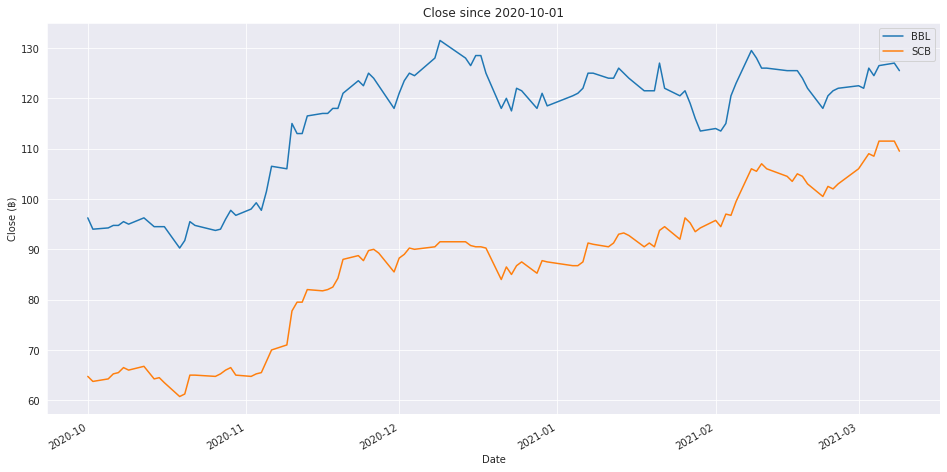

In [ ]:
stocks.plot(figsize=(16,8), grid=True, ylabel='Close (฿)')
plt.title(f'Close since {stocks.index[0].strftime("%Y-%m-%d")}')

print(f'Close since {stocks.index[0].strftime("%Y-%m-%d")}')
plt.show()

นำราคาปิดของแต่ละหุ้นมาหารด้วยราคาปิดของข้อมูลวันแรกของแต่ละหุ้น

แล้วนำมาวาดกราฟ จะได้ค่าเริ่มต้นของแต่ละหุ้นอยู่ที่ 100 % เพื่อเปรียบเทียบกัน

%Growth since 2020-10-01


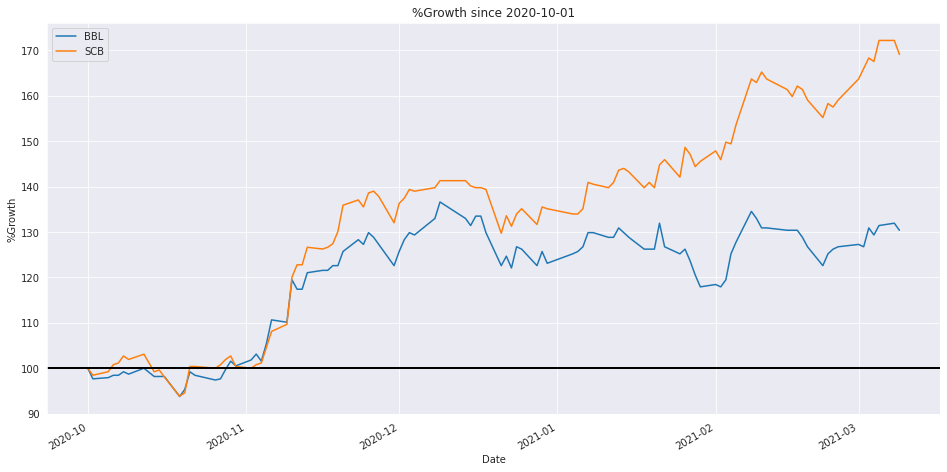

In [ ]:
stock_return = stocks.apply(lambda x: 100 * x / x[0])

stock_return.plot(figsize=(16,8), grid=True, ylabel='%Growth').axhline(y = 100, color = "black", lw = 2)
plt.title(f'%Growth since {stocks.index[0].strftime("%Y-%m-%d")}')

print(f'%Growth since {stocks.index[0].strftime("%Y-%m-%d")}')
plt.show()

นำปริมาณหุ้นรวมของทั้งสองธนาคารมา Plot กราฟแท่ง เพื่อเปรียบเทียบกันเป็นรายเดือน

Barchart of Volume per Month


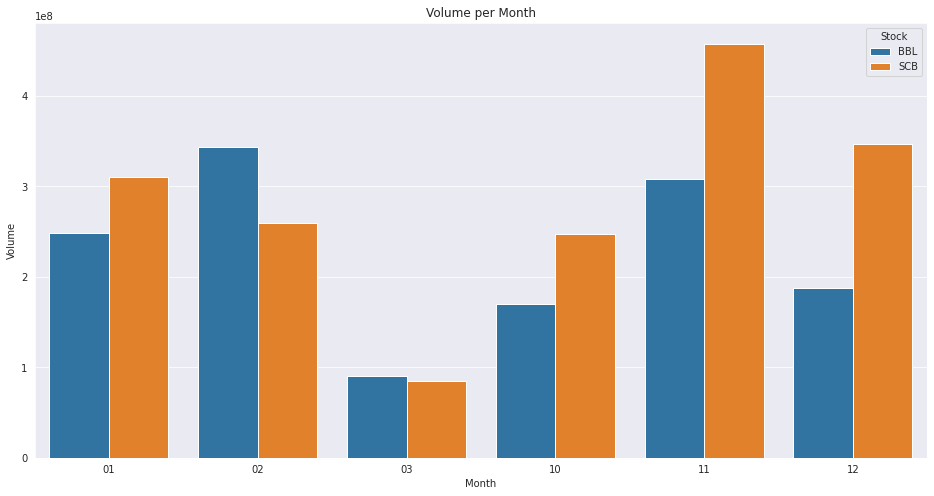

In [ ]:
get_month = lambda x: x.index.strftime("%m")
df = pd.concat([BBL[['Volume']].assign(Month=get_month(BBL)).groupby(['Month']).sum().assign(Stock='BBL'),
                SCB[['Volume']].assign(Month=get_month(SCB)).groupby(['Month']).sum().assign(Stock='SCB')])
df.reset_index(inplace=True)

fig = plt.figure(figsize=(16,8))

sns.barplot(x="Month", y="Volume", hue="Stock", data=df)
plt.title("Volume per Month")

print("Barchart of Volume per Month")
plt.show()

# พิจารณาแนวโน้มจากกราฟโดย mplfinance



เนื่องจากข้อมูลไม่ได้มีเพียงราคาปิด (Close) อย่างเดียว

เราจึงจะวาดกราฟของราคาเปิด (Open) ราคาปิด (Close) ราคาสูงสุด (High) และราคาต่ำสุด (Low) โดยใช้ library: mplfinance

In [ ]:
%%capture
!pip install mplfinance
import mplfinance as mpf

สร้างกราฟแท่งเทียนของทั้งสองหุ้น โดยสีแดงแสดงถึงราคาหุ้นที่ลดลง และสีเขียวแสดงถึงราคาหุ้นที่เพิ่มขึ้น

Candlestick


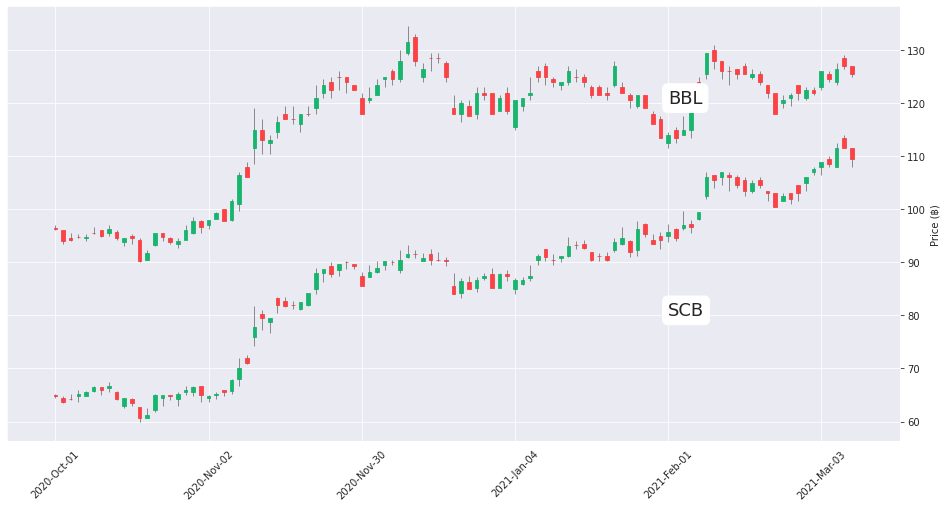

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

mpf.plot(BBL, ax=ax, style='yahoo', type='candle')
ax.annotate('BBL', (80,120), fontsize=18, bbox=dict(boxstyle="round", fc="w"))

mpf.plot(SCB, ax=ax, style='yahoo', type='candle')
ax.annotate('SCB', (80,80), fontsize=18, bbox=dict(boxstyle="round", fc="w"))

ax.set_ylabel('Price (฿)')

print("Candlestick")
plt.show()

Candlestick with Volume


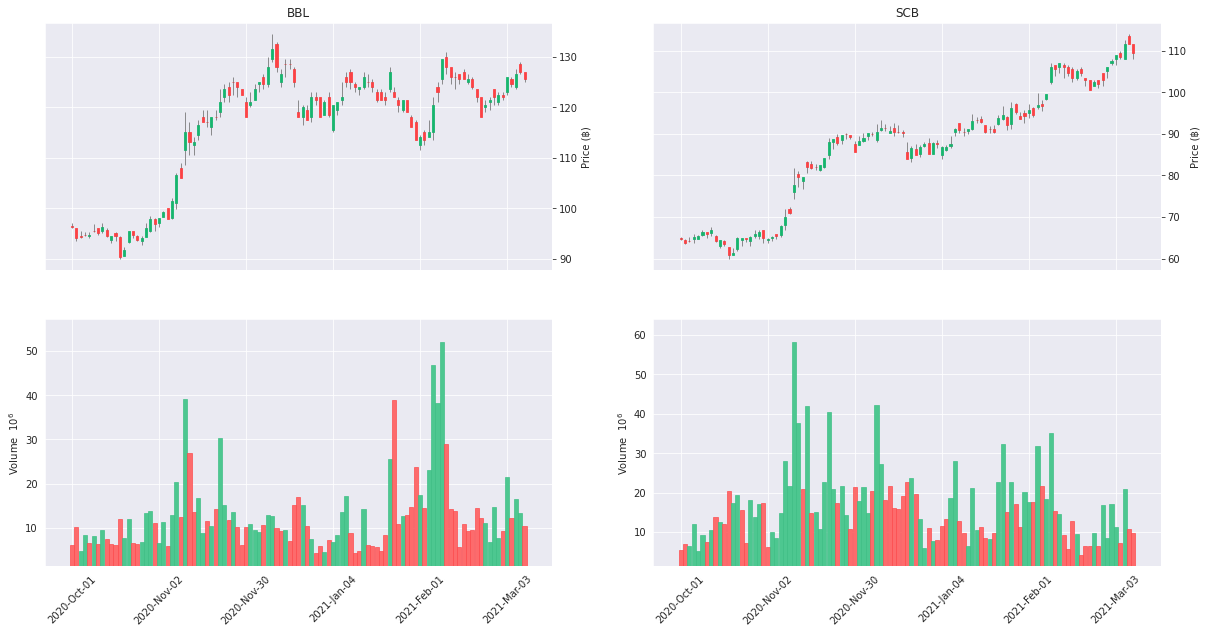

In [ ]:
fig = plt.figure(figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2, sharex='col')

mpf.plot(BBL, style='yahoo', ax=ax1, volume=ax3, type='candle', ylabel='Price (฿)')
ax1.set_title('BBL')

mpf.plot(SCB, style='yahoo', ax=ax2, volume=ax4, type='candle', ylabel='Price (฿)')
ax2.set_title('SCB')

print("Candlestick with Volume")
plt.show()

# พิจารณาแนวโน้มโดยใช้ดัชนีหุ้น MA และ MACD

เพื่อให้การพิจารณาแนวโน้มง่ายยิ่งขึ้น เราจะใช้ดัชนีหุ้นช่วยประกอบการตัดสินใจดังต่อไปนี้


## Moving Average (MA)

Moving Average(MA) คือเส้นค่าเฉลี่ยเคลื่อนที่ เป็นค่าเฉลี่ยของราคาหุ้นที่คำนวณ โดยใช้ข้อมูลย้อนหลังของราคาหุ้นตามที่ระยะเวลาที่กำหนด 
ซึ่งข้อมูลราคาหุ้นที่นิยมนำมาใช้คำนวณค่า MA คือ ราคาปิดของหุ้นของช่วงระยะเวลาที่เราสนใจ

MA มีทั้งหมด 3 ประเภท คือ
1.   Simple Moving Average (SMA)
2.   Exponential Moving Average (EMA)
3.   Weighted Moving Average (WMA)
 
โดยเลือกแสดง MA 3 ช่วงได้แก่ 5 วัน (MA5) 10 วัน (MA10) และ 20 วัน (MA20)          

Candlestick with Moving Average (MA)


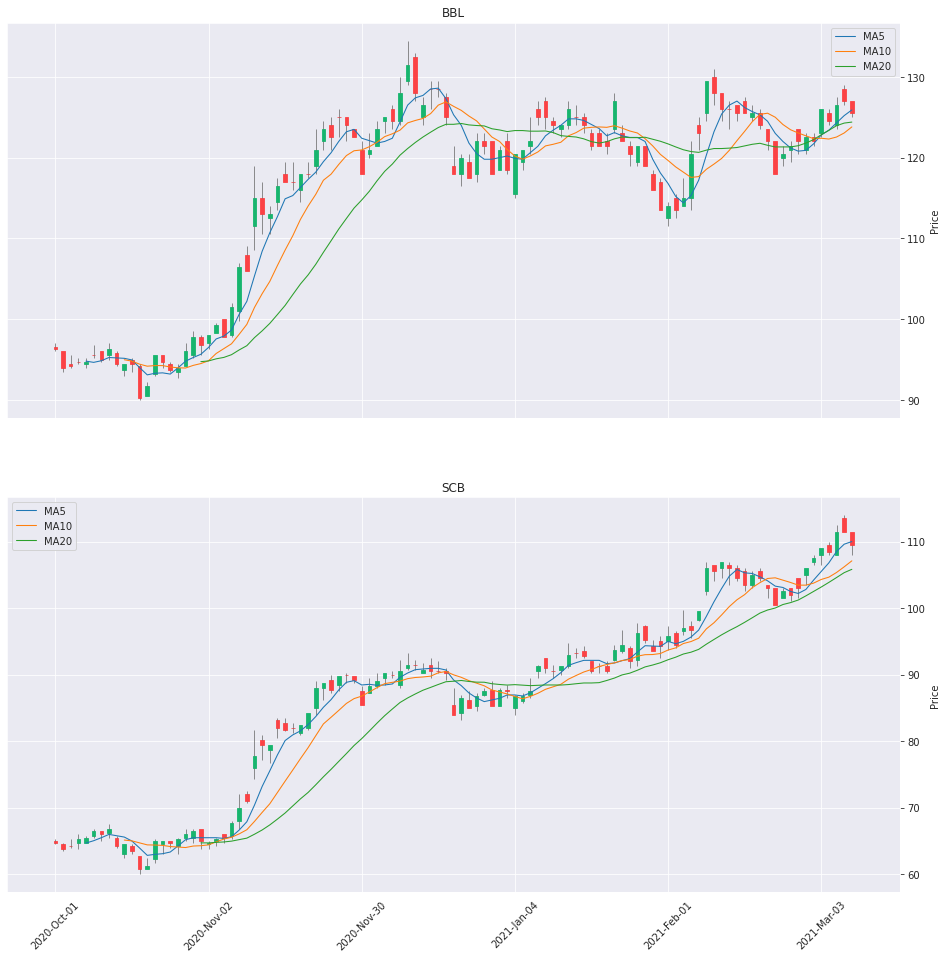

In [ ]:
MA = ['MA5', 'MA10', 'MA20']

fig = plt.figure(figsize=(16,16))
ax1, ax2 = fig.subplots(2, 1, sharex="col")

mpf.plot(BBL,style='yahoo', ax=ax1, type='candle', mav=(5,10,20))
ax1.set_title('BBL')
ax1.legend(MA)

mpf.plot(SCB,style='yahoo', ax=ax2, type='candle', mav=(5,10,20))
ax2.set_title('SCB')
ax2.legend(MA)
                
print("Candlestick with Moving Average (MA)")
plt.show()

MA5 (สีฟ้า) = คือเส้น Simple Moving Average ระยะเวลา5วัน

MA10 (สีส้ม) = คือเส้น Simple Moving Average ระยะเวลา10วัน

MA20 (สีเขียว) = คือเส้น Simple Moving Average ระยะเวลา20วัน

---

เส้น MA ที่คำนวณจากจำนวนวันข้อมูลราคาย้อนหลังที่น้อย จะเคลื่อนที่ติดตามกราฟราคาหุ้นได้ใกล้ชิดและเร็วกว่าเส้น MA ที่คำนวณจากจำนวนวันของข้อมูลราคาย้อนหลังที่มาก

จะเห็นว่า  

*   MA5 เคลื่อนที่ตามราคาเร็วที่สุด
*   MA10 เคลื่อนที่ตามราคาเร็วกว่า MA20 แต่ช้ากว่า MA5
*   MA20 เคลื่อนที่ตามราคาช้าที่สุด


 ## Moving Average Convergence Divergence (MACD)

MACD (Moving Average Convergence Divergence ) 
คือ Indicator ที่มีแนวคิดมาจากการวาด Moving Average ขึ้นพร้อมๆ กัน 2 เส้นแล้วนำมาวิเคราะห์ลักษณะที่เกิดขึ้นระหว่าง Moving Average ทั้ง 2 เส้น 

EMA12 = เส้น exponential moving average ระยะสั้น (12 วัน)

EMA26 = เส้น exponential moving average ระยะยาว (26 วัน)

การคำนวณค่า MACD เป็นการวัดระยะห่างระหว่างเส้นค่าเฉลี่ยเคลื่อนที่ 2 เส้น เพื่อดูว่าเส้นค่าเฉลี่ยเคลื่อนที่ 2 เส้นกำลังเคลื่อนที่ลู่เข้าหากันหรือแยกออกจากกัน (เส้นไหนอยู่บน เส้นไหนอยู่ล่าง อยู่ห่างกันมากน้อยเพียงใด) โดยมีสูตรในการคำนวณ MACD ดังนี้

$$\text{MACD} = \text{EMA}(12) – \text{EMA}(26)$$

โดยกำหนดให้เส้นแนวนอนที่ค่า MACD = 0 เรียกว่า center line

จากกราฟจะได้ว่า

1) ถ้า MACD มีค่าเป็นบวก (+) แสดงว่า เส้นกราฟ EMA(12) อยู่เหนือเส้น EMA(26)

นั่นคือ
$$\text{EMA}(12) > \text{EMA}(26)$$

2) ถ้า MACD มีค่าเป็นลบ (-) แสดงว่า เส้นกราฟ EMA(12) อยู่ใต้ EMA(26)

นั่นคือ
$$\text{EMA}(12) < \text{EMA}(26)$$

3) ถ้า MACD มีค่าเป็น 0 แสดงว่า เส้นกราฟ EMA(12) ตัดกับ EMA(26)

นั่นคือ
$$\text{EMA}(12) = \text{EMA}(26) $$


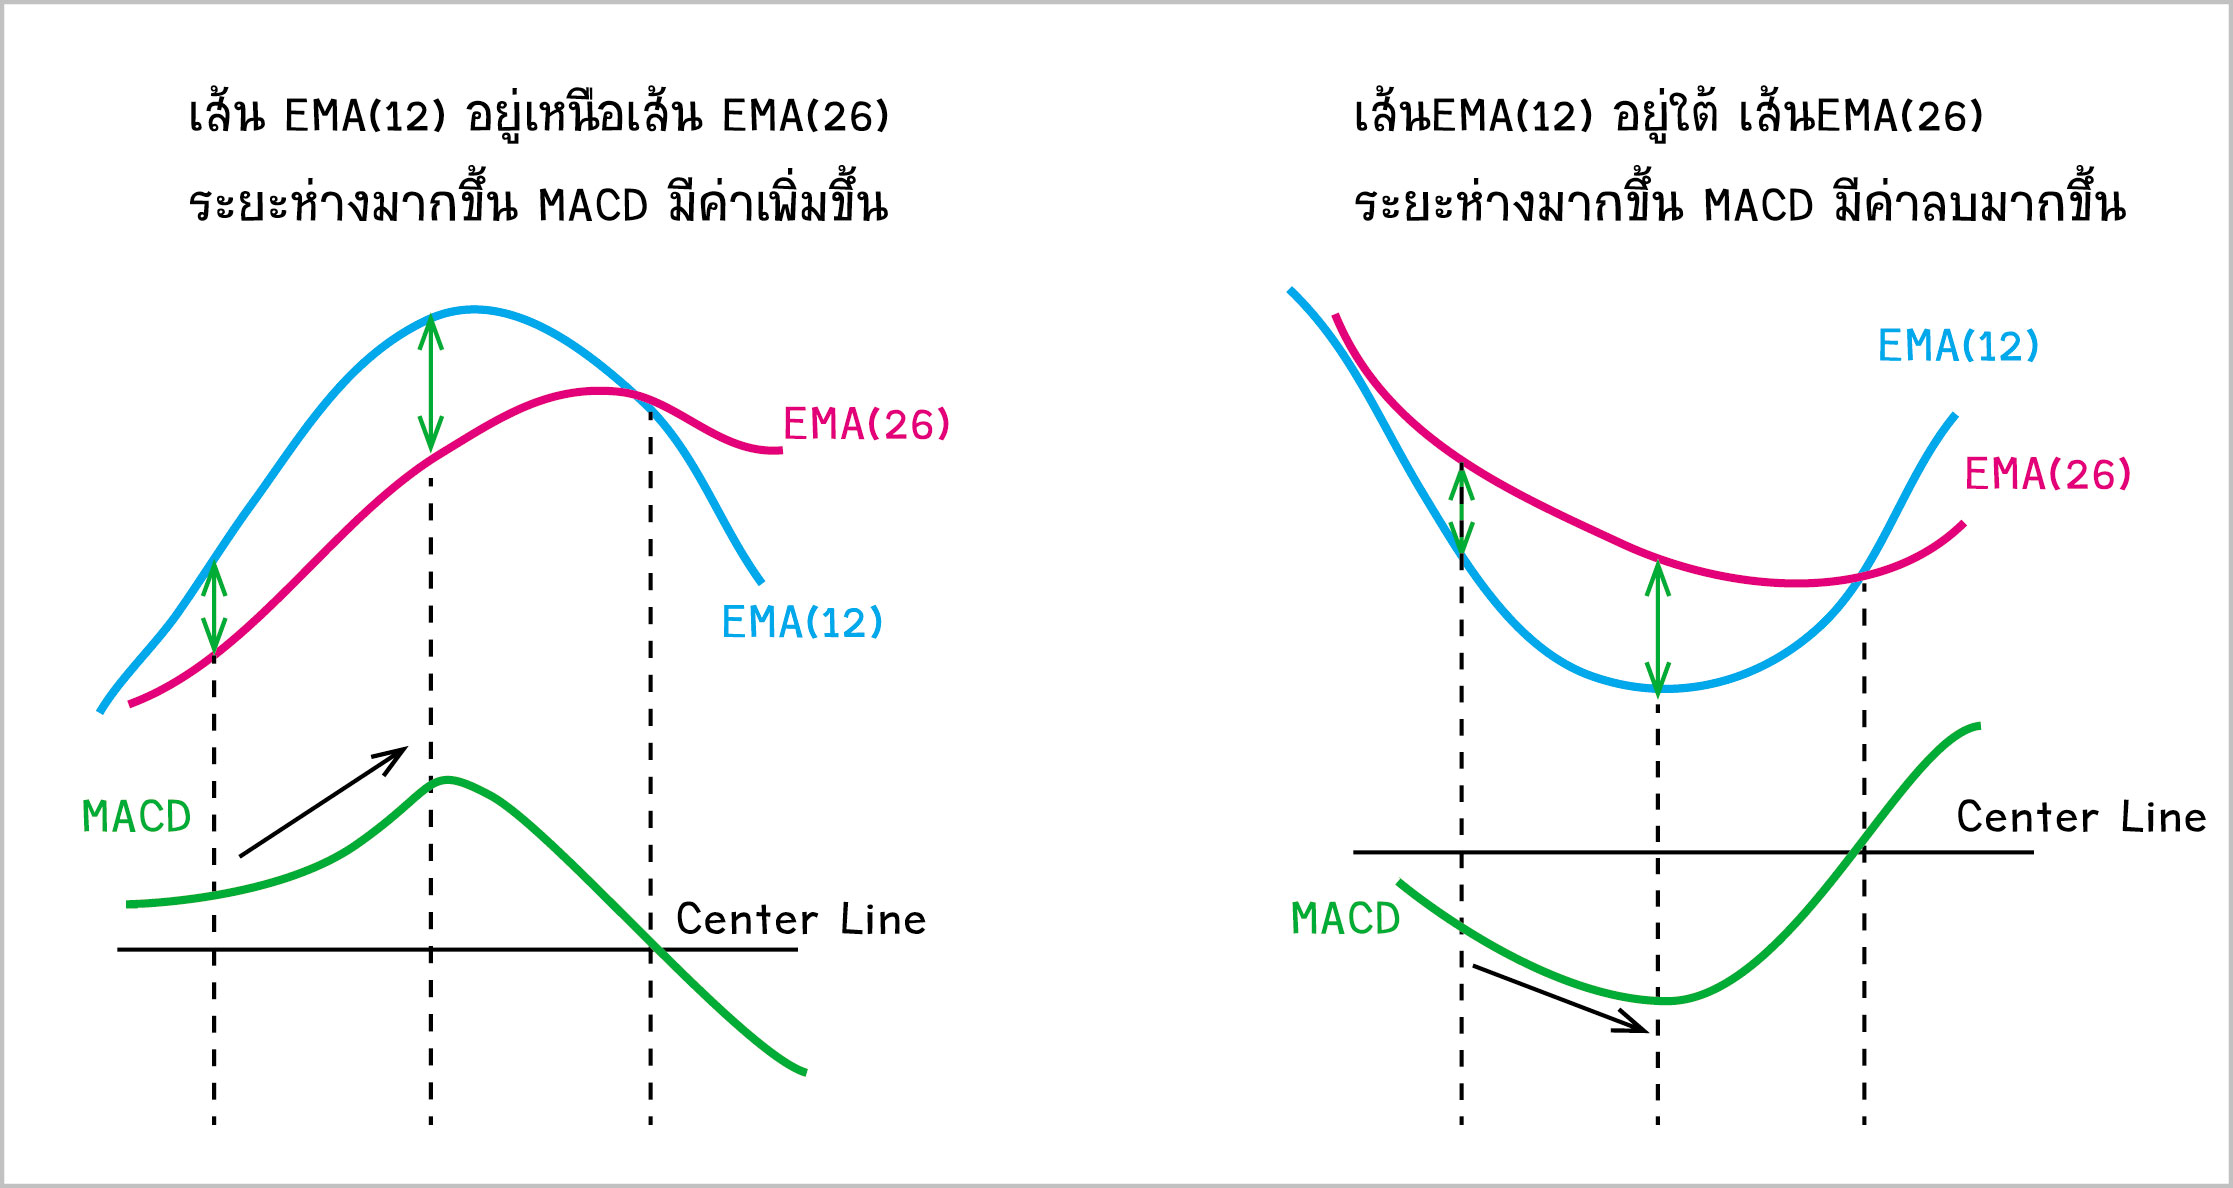

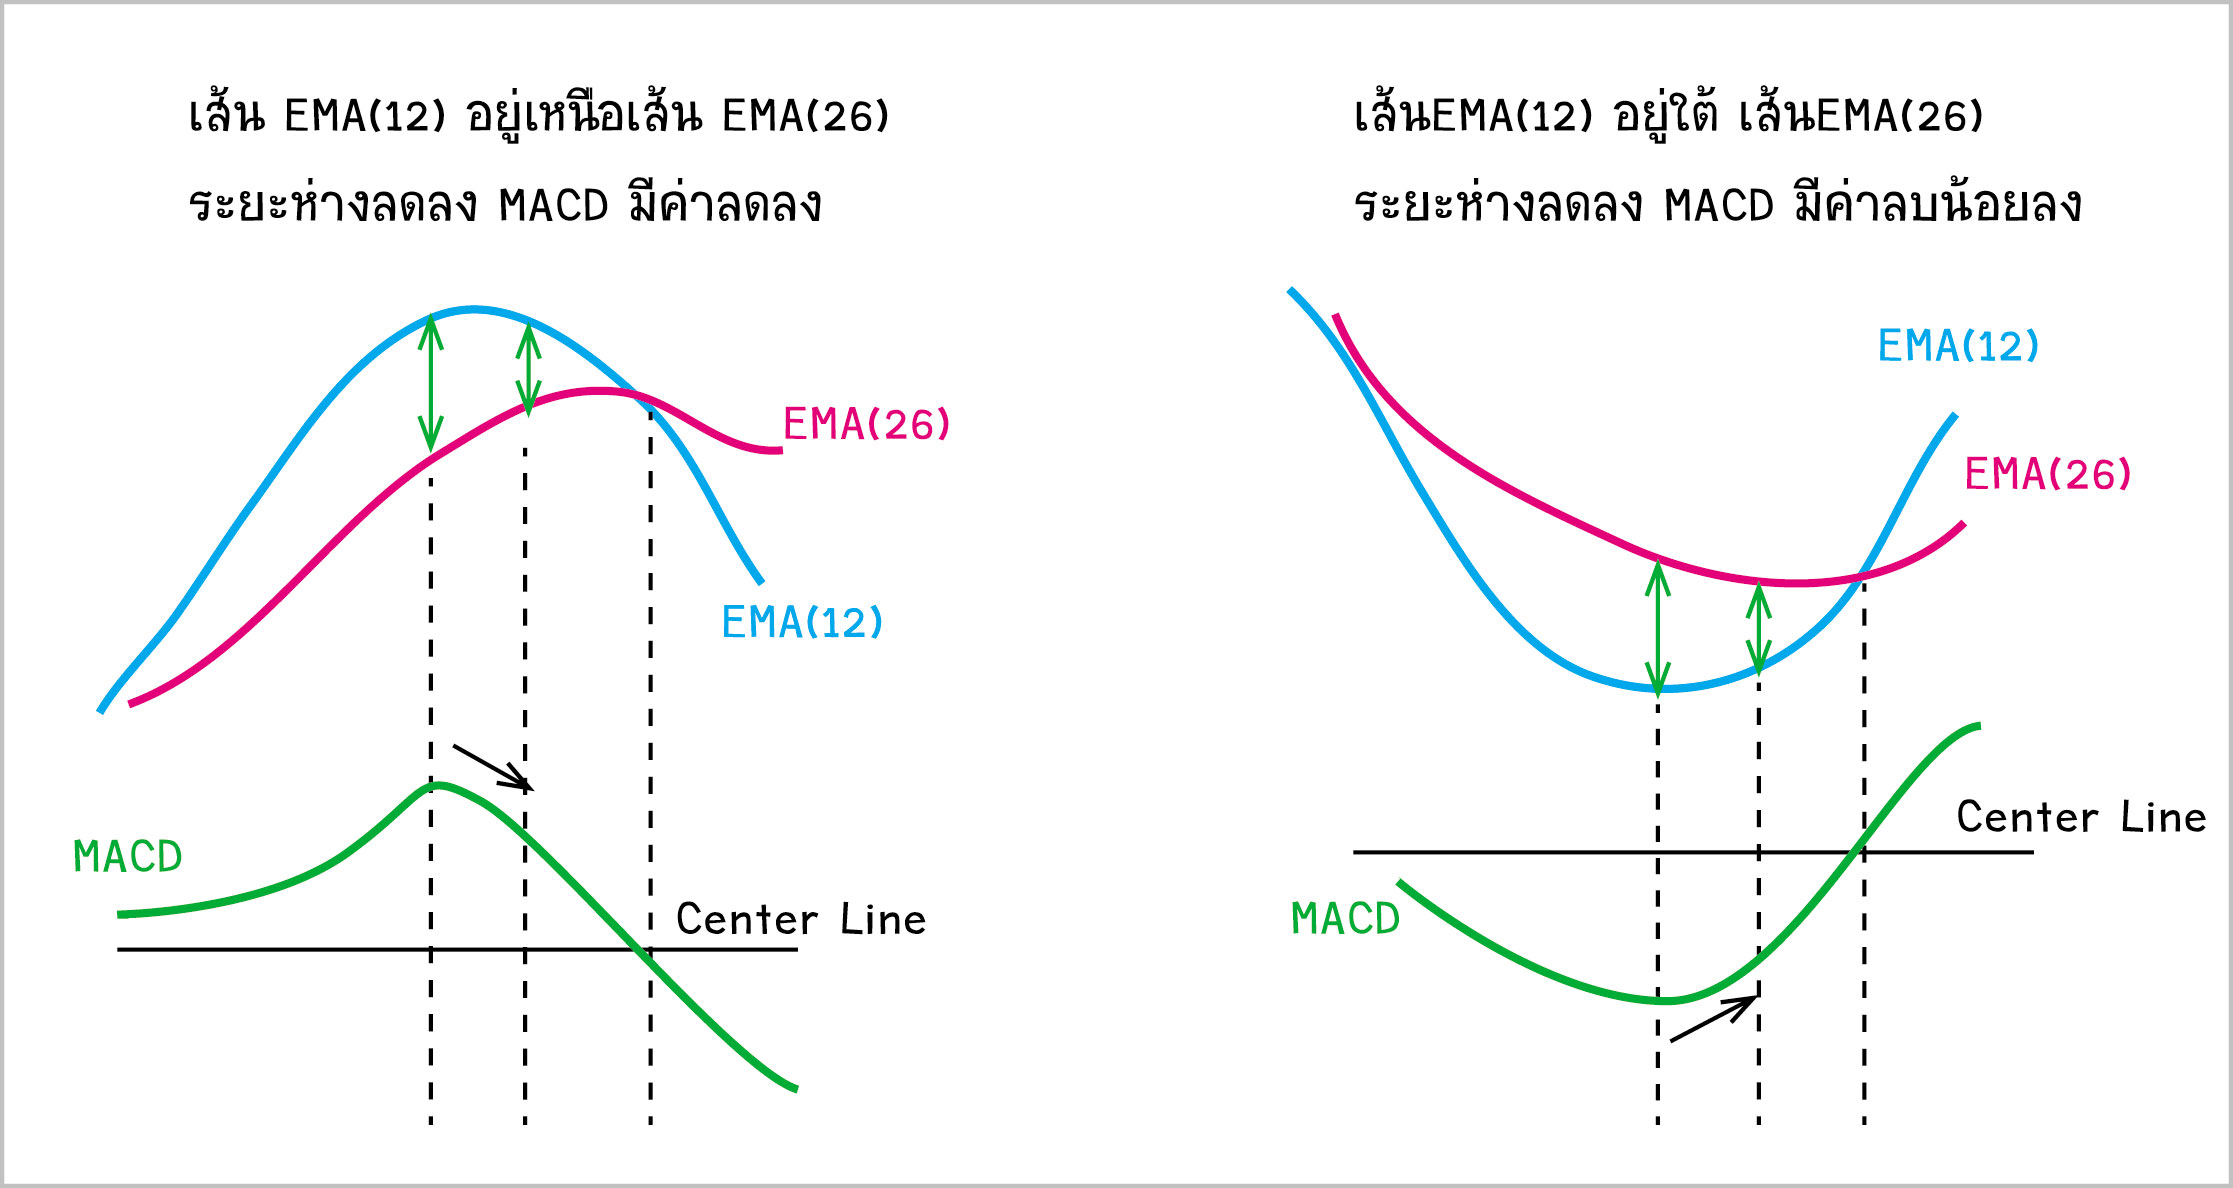

แหล่งที่มา (ภาพ) : https://www.finnomena.com/daddy-trader/macd/

In [ ]:
cal_EMA = lambda df, period: df['Close'].ewm(span=period, adjust=False).mean()

def plot_EMA(df, short=12, long=26):
    col_s, col_l = 'EMA' + str(short), 'EMA' + str(long)
    EMA = pd.DataFrame({col_s: cal_EMA(df, short),
                        col_l: cal_EMA(df, long)})
    EMA[col_s][:short] = np.NaN
    EMA[col_l][:long] = np.NaN
    return EMA

def plot_MACD(df, short=12, long=26):
    short_EMA =  cal_EMA(df, short)
    long_EMA = cal_EMA(df, long)
    MACD = short_EMA - long_EMA
    MACD[:long] = np.NaN
    return MACD

Candlestick with Moving Average Convergence Divergence (MACD)


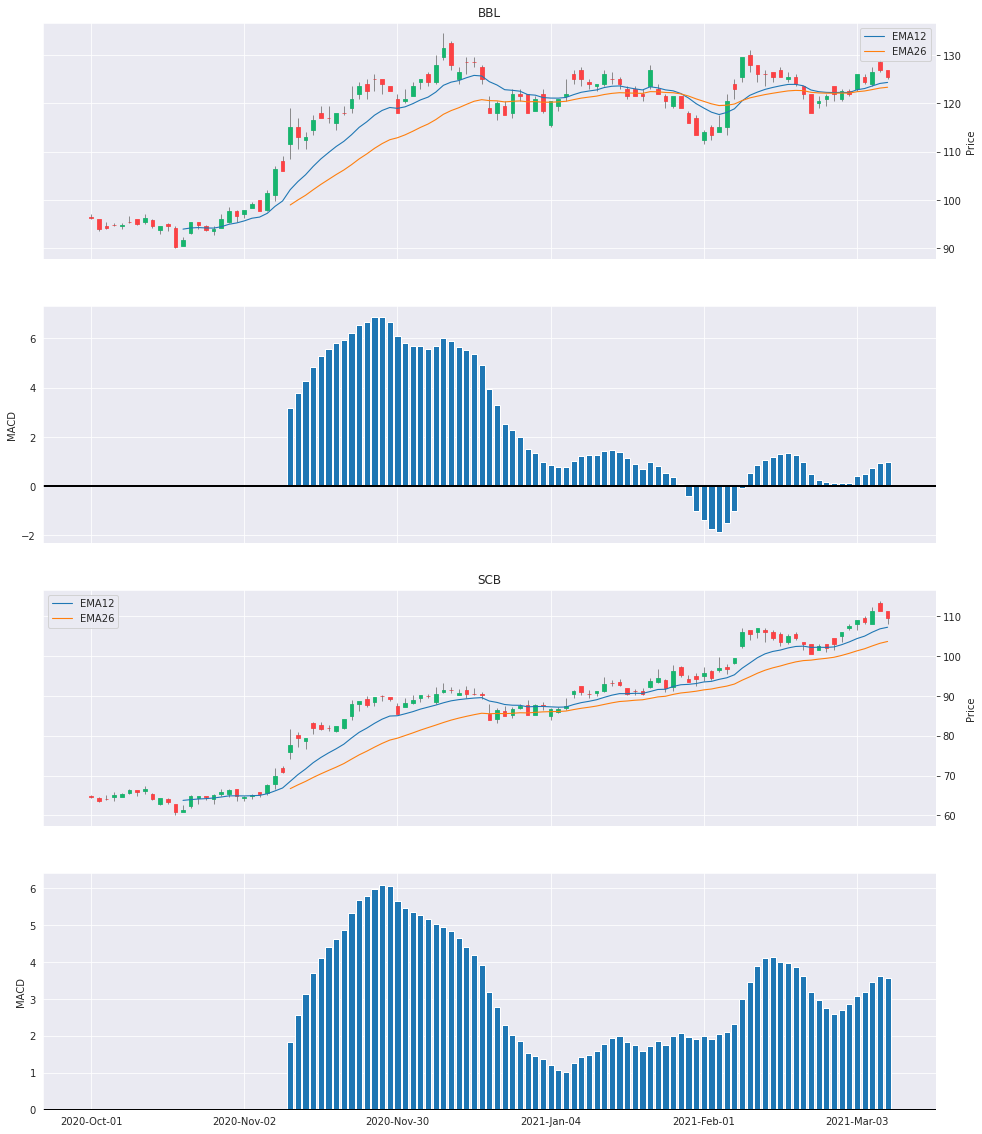

In [ ]:
fig = plt.figure(figsize=(16,20))
ax1, ax2, ax3, ax4 = fig.subplots(4, 1, sharex=True)

ap1 = mpf.make_addplot(plot_EMA(BBL), ax=ax1, width=1.1)
ap2 = mpf.make_addplot(plot_MACD(BBL), type='bar', ax=ax2)
mpf.plot(BBL, style='yahoo', ax=ax1, type='candle', addplot=[ap1, ap2])
ax1.set_title('BBL')
ax1.legend(['EMA12', 'EMA26'])

ax2.axhline(y = 0, color = "black", lw = 2)
ax2.set_ylabel("MACD")

ap3 = mpf.make_addplot(plot_EMA(SCB), ax=ax3, width=1.1)
ap4 = mpf.make_addplot(plot_MACD(SCB), type='bar', ax=ax4)
mpf.plot(SCB, style='yahoo', ax=ax3, type='candle', addplot=[ap3, ap4])
ax3.set_title('SCB')
ax3.legend(['EMA12', 'EMA26'])

ax4.axhline(y = 0, color = "black", lw = 2)
ax4.set_ylabel("MACD")

print("Candlestick with Moving Average Convergence Divergence (MACD)")
plt.show()

# บทสรุป



จากข้อมูล ได้ข้อสรุปดังนี้
      
      - ราคาของหุ้น BBL สูงกว่า SCB
      - ราคาปิดของหุ้น BBL และ SCB ต่ำกว่าราคาปิดในวันแรกของข้อมูล
      - ปริมาณการซื้อขายของหุ้น SCB สูงกว่า BBL ในทุกเดือน
      - สามารถใช้ MA และ MACD เพื่อประกอบการตัดสินใจในการลงทุนได้

---
